# <h1><center>PIMA Diabetes - Regression Model</center></h1>

## <center>By : Nitika</center>

## About the Dataset:
   
    For analysis we are using Diabetes dataset. The objective is to diagnostically 
    predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [433]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib.ticker import FormatStrFormatter

In [434]:
## on my system there is an issue so give the whole path for the file
# in order to run on your local either use the second option else give the absolute path
diabetes_data="~/Documents/workspace/DataScience/IntoToDS/presentation/diabetes.csv"
#diabetes_data="diabetes.csv"

#load data using panda's read_csv function
diabetes_df = pd.read_csv(diabetes_data)


#list the dataset
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Finding the missing values in dataset :

In [435]:
# check for missing data in any of the variables
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [436]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exploratory Data Analysis

## Lets analyse Pregnancies data:

In [437]:
preg_proportion = np.array(diabetes_df['Pregnancies'].value_counts())

preg_month = np.array(diabetes_df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)
preg_proportion_perc

array([17, 14, 13,  9,  8,  7,  6,  5,  4,  3,  3,  1,  1,  1,  0,  0,  0])

In [438]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


### plot the graph for better understanding

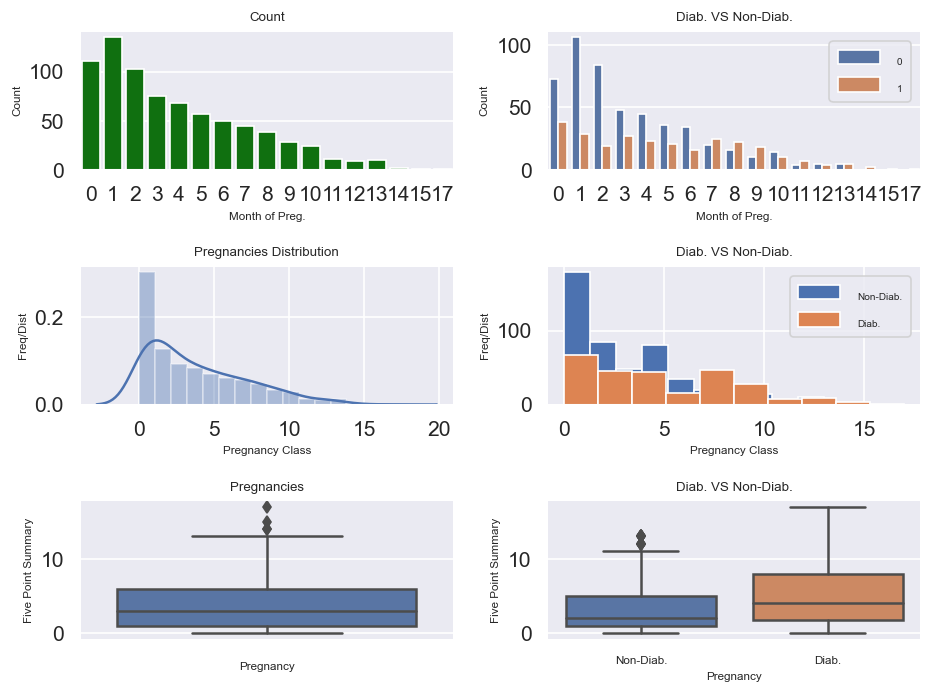

In [439]:
fig,axes = plt.subplots(nrows=3,ncols=2,dpi=120,figsize = (8,6))

plot00=sns.countplot('Pregnancies',data=diabetes_df,ax=axes[0][0],color='green')
axes[0][0].set_title('Count',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.countplot('Pregnancies',data=diabetes_df,hue='Outcome',ax=axes[0][1])
axes[0][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Month of Preg.',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count',fontdict={'fontsize':7})
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10 = sns.distplot(diabetes_df['Pregnancies'],ax=axes[1][0])
axes[1][0].set_title('Pregnancies Distribution',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plt.tight_layout()

plot11 = diabetes_df[diabetes_df['Outcome']==False]['Pregnancies'].plot.hist(ax=axes[1][1],label='Non-Diab.')
plot11_2=diabetes_df[diabetes_df['Outcome']==True]['Pregnancies'].plot.hist(ax=axes[1][1],label='Diab.')
axes[1][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[1][1].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[1][1].set_ylabel('Freq/Dist',fontdict={'fontsize':7})
plot11.axes.legend(loc=1)
plt.setp(axes[1][1].get_legend().get_texts(), fontsize='6') # for legend text
plt.setp(axes[1][1].get_legend().get_title(), fontsize='6') # for legend title
plt.tight_layout()

plot20 = sns.boxplot(diabetes_df['Pregnancies'],ax=axes[2][0],orient='v')
axes[2][0].set_title('Pregnancies',fontdict={'fontsize':8})
axes[2][0].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][0].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.tight_layout()

plot21 = sns.boxplot(x='Outcome',y='Pregnancies',data=diabetes_df,ax=axes[2][1])
axes[2][1].set_title('Diab. VS Non-Diab.',fontdict={'fontsize':8})
axes[2][1].set_xlabel('Pregnancy',fontdict={'fontsize':7})
axes[2][1].set_ylabel('Five Point Summary',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
plt.tight_layout()
plt.show()

#### The distribution of Pregnancies in data is skewed to the right, centered at about 1 with most of the data between 0 and 15, A range of roughly 15, and outliers are present on the higher end
    BoxPlot of both categories shows that People with higher pregnancy months have higher risk of Diabetes

## Let's have a look into Glucose variable

In [440]:
diabetes_df.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

### Plot the graph for better understanding the Glucose variable with the target variable 'Outcome'

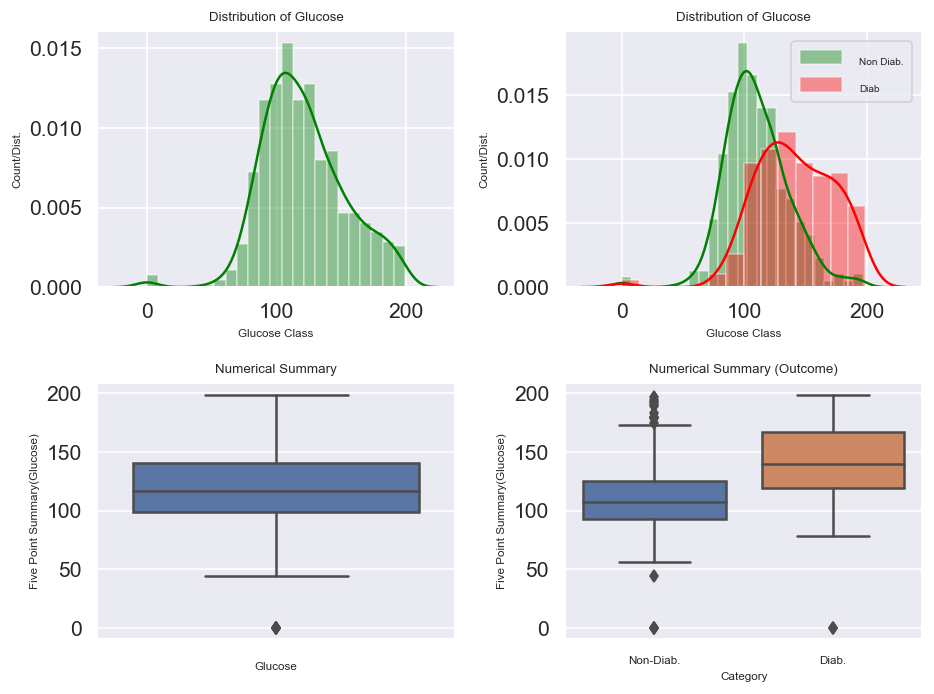

In [441]:
fig,axes = plt.subplots(nrows=2,ncols=2,dpi=120,figsize = (8,6))


plot00=sns.distplot(diabetes_df['Glucose'],ax=axes[0][0],color='green')
axes[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0][0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot01=sns.distplot(diabetes_df[diabetes_df['Outcome']==False]['Glucose'],ax=axes[0][1],color='green',label='Non Diab.')
sns.distplot(diabetes_df[diabetes_df.Outcome==True]['Glucose'],ax=axes[0][1],color='red',label='Diab')
axes[0][1].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0][1].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0][1].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
axes[0][1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plot01.axes.legend(loc=1)
plt.setp(axes[0][1].get_legend().get_texts(), fontsize='6')
plt.setp(axes[0][1].get_legend().get_title(), fontsize='6')
plt.tight_layout()

plot10=sns.boxplot(diabetes_df['Glucose'],ax=axes[1][0],orient='v')
axes[1][0].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1][0].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1][0].set_ylabel('Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

plot11=sns.boxplot(x='Outcome',y='Glucose',data=diabetes_df,ax=axes[1][1])
axes[1][1].set_title('Numerical Summary (Outcome)',fontdict={'fontsize':8})
axes[1][1].set_ylabel('Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.xticks(ticks=[0,1],labels=['Non-Diab.','Diab.'],fontsize=7)
axes[1][1].set_xlabel('Category',fontdict={'fontsize':7})
plt.tight_layout()

plt.show()

#### The distribution of Glucose level among patients roughly bell shaped, centered at about 115 with most of the data between 90 and 140, A range of roughly 150, and outliers are present on the lower end(Glucose ==0).

BoxPlot of both categories shows that People with higher Glucose level have higher risk of Diabetes. We can also see that some outliers are present on non diabetic patient observation.




## Correlation Matrix

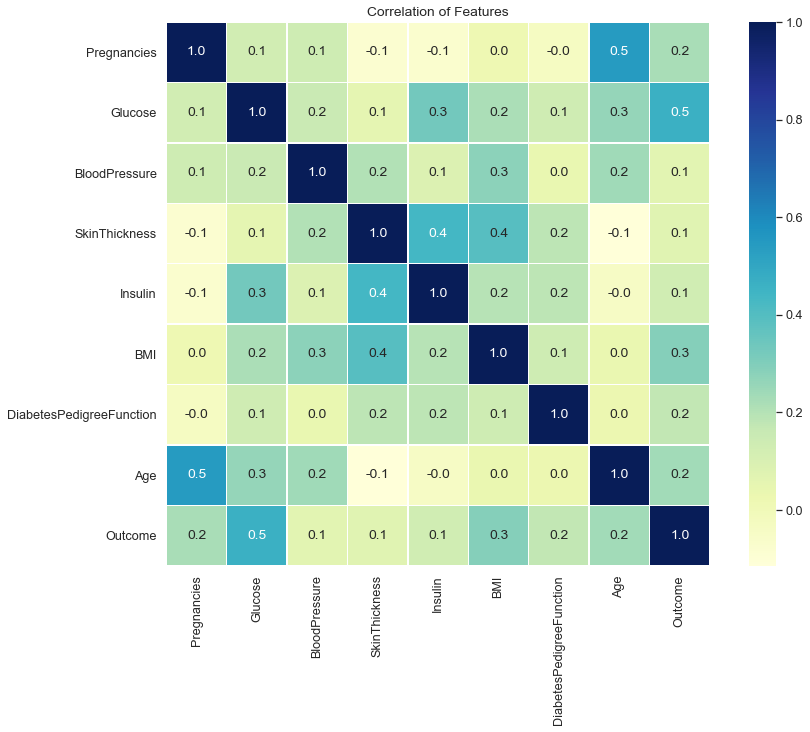

In [442]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(diabetes_df.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

#### We observe that:
    * Glucose, Age and BMI are the most Correlated features with the 'Outcome'
    * Bloodpressure, SkinThikness have tiny Correlation with the outcome !
    * check how the SkinThikness and BMI Correlated, since most of the fat people tends to have thick skin
    * Age with Pregnancies are the most Correlated features
    * Insulin with Glucuse
    * finally SkinThikness with Insulin !

# Regression Analysis
    Linear regression assumes a linear relationship between the input variable (X) and a single output variable (Y). When there is a single input variable, the method is referred to as a simple linear regression.

    In a simple linear regression, we can estimate the coefficients required by the model to make predictions on new data analytically. That is, the line for a simple linear regression model can be written as:
                                    𝑦𝑖=𝛼+𝛽𝑥𝑖+𝜀𝑖
                                    
    Here , Epsilon is the error term ,Alpha  𝛼  is the y intercept and Beta  𝛽   is slope of the line
    
    Once the coefficients are estimated, we can use this equation to predict output values for y conditional on new input examples of x
    
      In this example , the attribute - Outcome: is binary categorical variable (0 if non-diabetic, 1 if diabetic), since if 
      dependent variable is a binary categorical variable and independent variable is nominal, ordinal, interval or ratio then for classification purposes we use the technique like Logistic Regression

## 1) To predict whether patients is diabetic or not.

    When using machine learning, we usually have two sets of data, (i) training data and (ii) testing data. The training dataset contains of the input data together with correct/expected output. The model learns on this data in order to be generalised to other data later on. The test dataset is a subset to test the trained model.
    
    We divided the data into X and y data frames. X has eight input features and y is a single output for the prediction we want to make — whether or not the patients have diabetes or not. We then split them each into training and testing data. To split the data into test and train we will use the train_test_split function from sklearn. We have split the dataset in a 70–30 ratio. We will use the training data frames to build our Logistic Regression model and test to compare its performance.

In [443]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df[['Outcome']]

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.03, random_state = 7)


In [456]:
# fit model on 30% of data
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train.values.reshape(-1))

LogisticRegression(max_iter=1000)

In [457]:
model_score = logistic_model.score(X_test, y_test)
y_predict = logistic_model.predict(X_test)

In [458]:
print("coefficient of determination:", model_score)

coefficient of determination: 0.8333333333333334


#### We get a 83% precise classifier using Logistic Regression.

In [459]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
confusion_matrix

array([[13,  2],
       [ 2,  7]])

 So, as we can se that confusion matrix confirm that our model allow to classify the person as diabetic or not based on the feature in our dataset

## Confusion matrix graph

<Figure size 432x288 with 0 Axes>

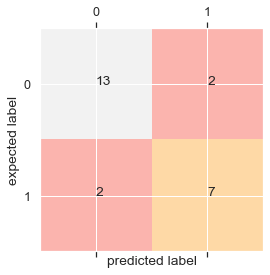

In [460]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0, 2):
    for y in range(0, 2):
        plt.text(x, y, confusion_matrix[x, y])
        
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

## 2) BMI effect the outcome(diabetes) ?

In [461]:
x_bmi = np.array(diabetes_df['BMI']).reshape(-1,1)
y_diabetes = np.array(diabetes_df['Outcome'])

In [462]:
reg_model= LinearRegression().fit(x_bmi,y_diabetes)

In [463]:
# obtained the coefficient of determination (𝑅²) with .score() called on model:
r_sq = reg_model.score(x_bmi,y_diabetes)
print("coefficient of determination", r_sq)

coefficient of determination 0.08567016554054585


    we get the accuracy of 85% , which shows how much BMI effect diabetes progression 

In [467]:
# The attributes of model are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:
print('intercept:', reg_model.intercept_)
print('slope:', reg_model.coef_)

intercept: -0.21751921597439944
slope: [0.01770653]


    The value 𝑏₀ = -0.2175 (approximately) illustrates that your model predicts the response -0.2175 when 𝑥 is zero. The value 𝑏₁ = 0.01770 means that the predicted response rises by 0.01770 when 𝑥 is increased by one.

In [466]:
y_pred = reg_model.predict(x_bmi)
mean_squared_error = metrics.mean_squared_error(y_diabetes, y_pred)

print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Mean squared error: 0.21


Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.
In our case it is 21% not that large, so the accuracy of the model is correct and for a person to be diabetic other factors also matters.

## Conclusion

    So ,we finally achieve our  objective  to  predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the datase.

    For further enhancement we can look deep into how all other feature contribute to be a diabtetic or not.

# Thank You